
### 🎯 Motivation

* In **supervised ML** (e.g., classification), we validate models using metrics like **accuracy, precision, recall**.
* For **unsupervised ML** (e.g., clustering like K-Means, Hierarchical, DBSCAN), we need a metric to **validate clustering quality**.
* **Silhouette Score** helps measure how well clusters are formed.

---

### 📝 Steps in Silhouette Scoring

1. **Compute $a(i)$:**

   * For a data point $i$ in cluster $C_i$,
   * $a(i) = $ average distance between $i$ and all other points in the same cluster.
   * Formula:

     $$
     a(i) = \frac{1}{|C_i|-1} \sum_{j \in C_i, j \neq i} d(i,j)
     $$
   * Intuition: how well the point is clustered with its own group.

2. **Compute $b(i)$:**

   * Find the **nearest neighboring cluster** $C_j$ (minimum average distance).
   * $b(i) = $ average distance between $i$ and all points in $C_j$.
   * Formula:

     $$
     b(i) = \min_{j \neq i} \Bigg( \frac{1}{|C_j|} \sum_{k \in C_j} d(i,k) \Bigg)
     $$
   * Intuition: how far the point is from the *next best cluster*.

3. **Silhouette Score for each point $i$:**

   * Formula:

     $$
     s(i) = \frac{b(i) - a(i)}{\max\{a(i), b(i)\}}
     $$
   * Range: $-1 \leq s(i) \leq 1$.

---

### 📊 Interpretation

* $s(i) \approx +1$: Point is **well clustered** (tight within its cluster, far from others).
* $s(i) \approx 0$: Point lies **on the boundary** between clusters.
* $s(i) \approx -1$: Point is **misclassified** (closer to another cluster).

---

### ✅ Use Case

* Average silhouette score across all points indicates **overall clustering quality**.
* Helps **validate the choice of $k$** in K-Means or compare clustering methods.



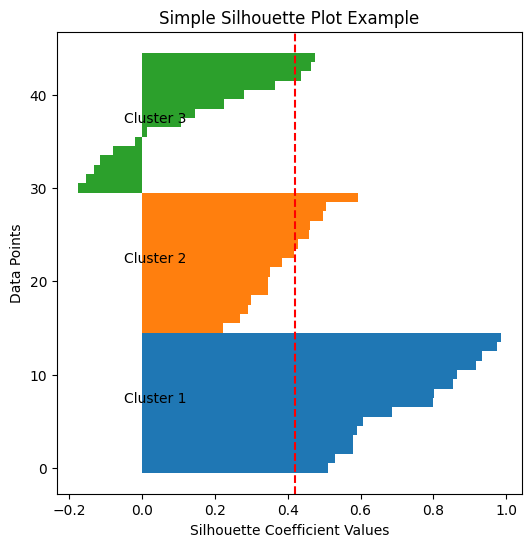

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Example silhouette values for 3 clusters
np.random.seed(42)
cluster1 = np.random.uniform(0.5, 1, 15)
cluster2 = np.random.uniform(0.2, 0.7, 15)
cluster3 = np.random.uniform(-0.2, 0.5, 15)

silhouette_values = np.concatenate([cluster1, cluster2, cluster3])
clusters = (["Cluster 1"] * len(cluster1) + 
            ["Cluster 2"] * len(cluster2) + 
            ["Cluster 3"] * len(cluster3))

# Sorting within clusters for better visualization
sorted_indices = np.argsort(silhouette_values)
silhouette_values = silhouette_values[sorted_indices]
clusters = np.array(clusters)[sorted_indices]

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(6, 6))

y_lower = 0
for cluster in ["Cluster 1", "Cluster 2", "Cluster 3"]:
    cluster_vals = silhouette_values[clusters == cluster]
    size = len(cluster_vals)
    y_upper = y_lower + size
    ax.barh(range(y_lower, y_upper), cluster_vals, height=1)
    ax.text(-0.05, (y_lower + y_upper) / 2, cluster, va='center')
    y_lower = y_upper

ax.axvline(x=np.mean(silhouette_values), color="red", linestyle="--")
ax.set_xlabel("Silhouette Coefficient Values")
ax.set_ylabel("Data Points")
ax.set_title("Simple Silhouette Plot Example")
plt.show()
